# Import

In [99]:
from generate_data import *
from tts_gan import *

# Paramètres

In [100]:
path_generator = "generated/generated_voltage_seq_len_1900_2024-12-10_13h19min/generator_epoch_200.pth"

# Load Generator

In [101]:
def load_generator(path):
    generator = Generator()
    generator.load_state_dict(torch.load(path))
    generator.eval()
    return generator

# Generated Signal

In [102]:
def generate_noise(batch_size):
    return torch.randn(batch_size, LATENT_DIM)

def generate_samples(generator):
    generator.eval()
    with torch.no_grad():
        z = generate_noise(1)
        sample = generator(z).cpu().numpy()[0]
    return sample

# Denormalisation des signaux

In [103]:
mean = 0.07262231578947369
std = 480.35565096827673

def denormalisation(signal):
    return signal * (std+1e-8) + mean

# Signal généré

In [104]:
generator = load_generator(path_generator)
sample = generate_samples(generator)
sample = denormalisation(sample)

/tmp/ipykernel_20487/718653842.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator.load_state_dict(torch.load(path))


In [105]:
sample.shape

(1900,)

/tmp/ipykernel_20487/907561725.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


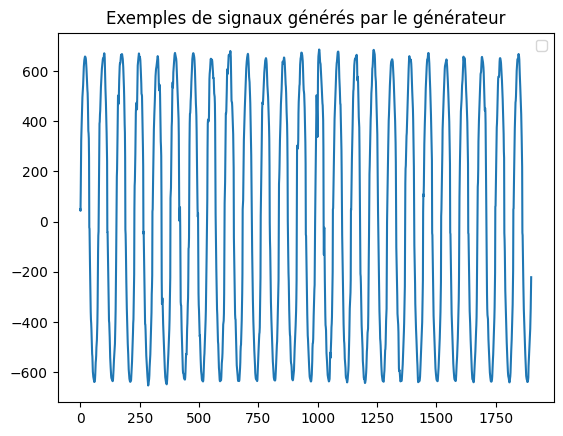

In [106]:
plt.plot(sample)
plt.title(f"Exemples de signaux générés par le générateur")
plt.legend()
plt.show()